<a href="https://colab.research.google.com/github/TheBuffMinashi/KaggleComputerVisionCourse/blob/main/Convolution_and_ReLU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook contains all the code and instructions from [**Kaggle's Computer Vision Course**](https://www.kaggle.com/learn/computer-vision)

# Introduction
In the last project, we saw that a convolutional classifier has two parts: a convolutional base and a head of dense layers. We learned that the job of the base is to extract visual features from an image, which the head would then use to classify the image.

Over the following few projects, we're going to learn about the two most important types of layers that we'll usually find in the base of a convolutional image classifier. These are the convolutional layer with ReLU activation and the maximum pooling layer. In part 5 of these projects series, we'll learn how to design our own convnet by composing these layers into blocks that perform the feature extraction.

This project is about the convolutional layer with its ReLU activation function.

# Feature Extraction
Before we get into the details of convolution, let's discuss the purpose of these layers in the network. We're going to see how these three operations (convolution, ReLU, and maximum pooling) are used to implement the feature extraction process.

The ***feature extraction*** performed by the base consists of ***three basic operations***:

1. ***Filter*** an image for a particular feature (convolution)
2. ***Detect*** that feature within the filtered image (ReLU)
3. **Condense** the image to enhance the features (maximum pooling)
The next figure illustrates this process. You can see how these three operations are able to isolate some particular characteristic of the original image (in this case, horizontal lines).


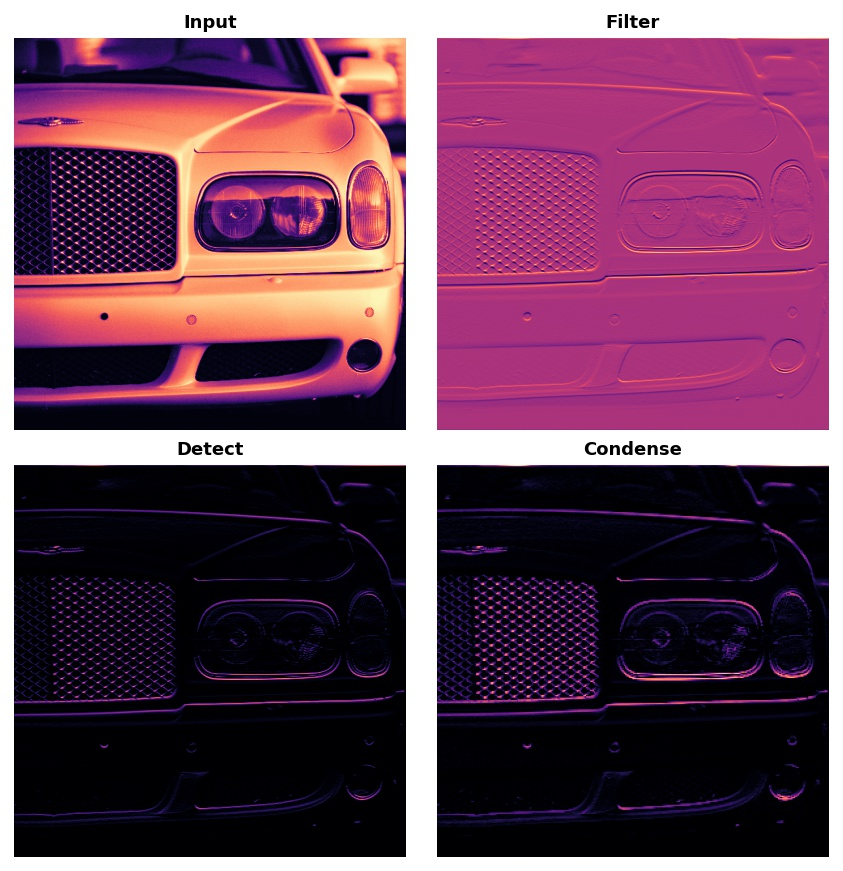


# Filter with Convolution
A convolutional layer carries out the filtering step. You can define a convolutional layer in a Keras model like this:


```
import tensorflow as tf
from tensorflow import keras

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=64, kernel_size=3)])
```
Note that in this example activation is None




We can understand these parameters by looking at their relationship to the weights and activations of the layer. 

# Weights
The weights a convnet learns during training are primarily contained in its convolutional layers. These weights we call kernels. We can represent them as small arrays:

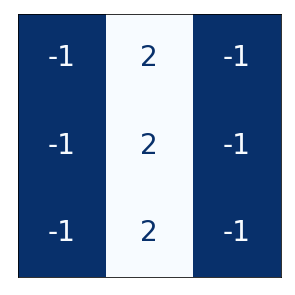

A kernel operates by scanning over an image and producing a weighted sum of pixel values. In this way, a kernel will act sort of like a polarized lens, emphasizing or deemphasizing certain patterns of information.




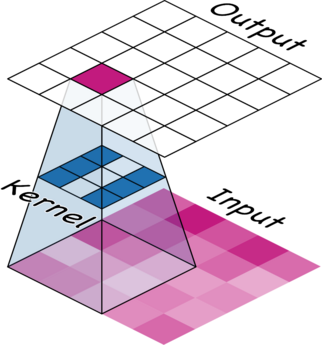

Kernels define how a convolutional layer is connected to the layer that follows. The kernel above will connect each neuron in the output to nine neurons in the input. By setting the dimensions of the kernels with ```kernel_size```, we are telling the convnet how to form these connections. Most often, a kernel will have odd-numbered dimensions like (3, 3) or (5, 5) so that a single pixel sits at the center, but this is not a requirement.

The kernels in a convolutional layer determine what kinds of features it creates. During training, a convnet tries to learn what features it needs to solve the classification problem. This means finding the best values for its kernels.

# Activations
The activations in the network we call feature maps. They are what result when we apply a filter to an image; they contain the visual features the kernel extracts. Here are a few kernels pictured with feature maps they produced.


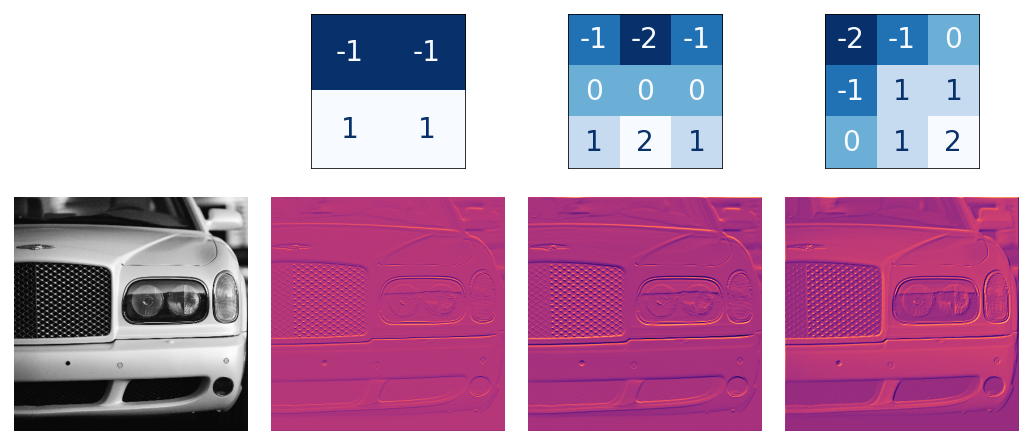



From the pattern of numbers in the kernel, you can tell the kinds of feature maps it creates. Generally, what a convolution accentuates in its inputs will match the shape of the positive numbers in the kernel. The left and middle kernels above will both filter for horizontal shapes.

With the ```filters``` parameter, you tell the convolutional layer how many feature maps you want it to create as output.


# Detect with ReLU
After filtering, the feature maps pass through the activation function. The rectifier function has a graph like this:



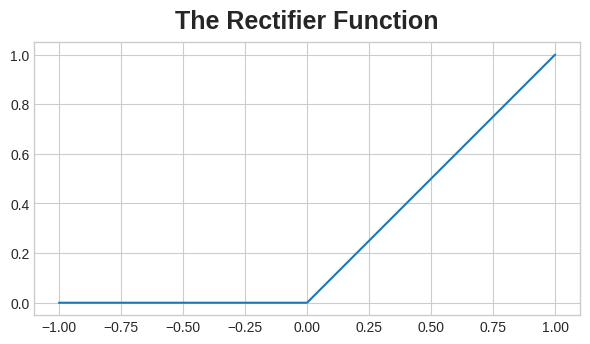




A neuron with a rectifier attached is called a rectified linear unit. For that reason, we might also call the rectifier function the ReLU activation or even the ReLU function.

The ReLU activation can be defined in its own ```Activation``` 
layer, but most often you'll just include it as the activation function of ```Conv2D```.

```
model = keras.Sequential([layers.Conv2D(filters=64, kernel_size=3, activation='relu')])
```

We can think about the activation function as scoring pixel values according to some measure of importance. The ReLU activation says that negative values are not important and so sets them to 0. ("Everything unimportant is equally unimportant.")

Here is ReLU applied the feature maps above. Notice how it succeeds at isolating the features.



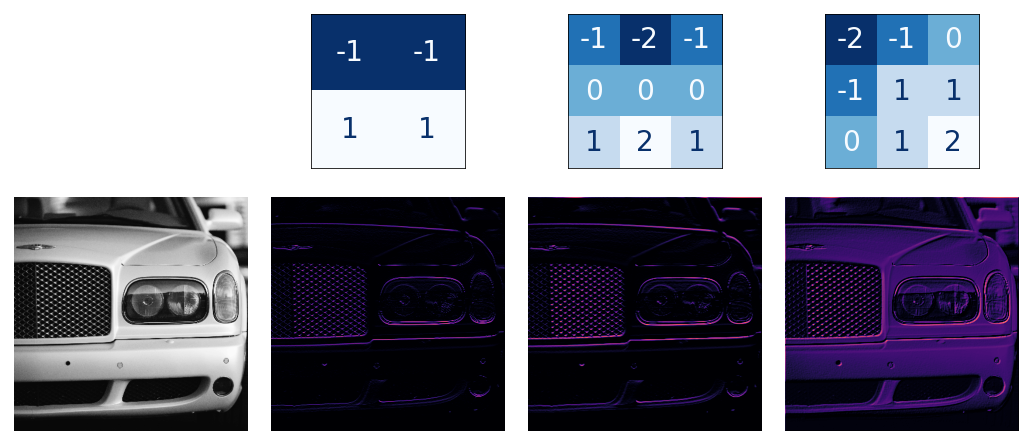

Like other activation functions, the ReLU function is nonlinear. Essentially this means that the total effect of all the layers in the network becomes different than what you would get by just adding the effects together which would be the same as what you could achieve with only a single layer. The nonlinearity ensures features will combine in interesting ways as they move deeper into the network. (We'll explore this "feature compounding" more in 5th project.)



## Example - Apply Convolution and ReLU
We'll do the extraction ourselves in this example to understand better what convolutional networks are doing "behind the scenes".

Here is the image we'll use for this example:

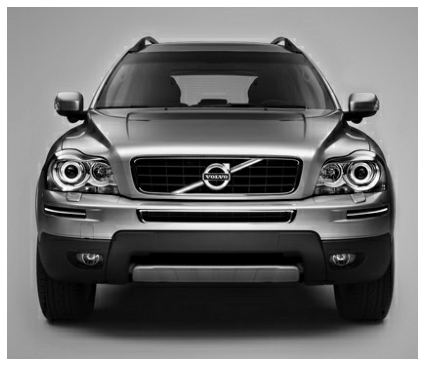

In [32]:
import tensorflow as tf
import matplotlib.pyplot as plt
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')

image_path = '/content/drive/MyDrive/Colab Notebooks/Car.jpg'
image = tf.io.read_file(image_path)
image = tf.io.decode_jpeg(image)

plt.figure(figsize=(6, 6))
plt.imshow(tf.squeeze(image), cmap='gray')
plt.axis('off')
plt.show();

For the filtering step, we'll define a kernel and then apply it with the convolution. The kernel in this case is an **"edge detection"** kernel. We can define it with ```tf.constant``` just like we'd define an array in Numpy with ```np.array```. This creates a tensor of the sort TensorFlow uses.

One thing to keep in mind is that the sum of the numbers in the kernel determines how bright the final image is. Generally, we should try to keep the sum of the numbers between 0 and 1

In [41]:
import tensorflow as tf

# 01. This is a 'Edge Detection' kernel
# kernel = tf.constant([
#     [-1, -1, -1],
#     [-1,  8, -1],
#     [-1, -1, -1]])

# Uncomment the code below to try other kernels as well
# 02. This is a 'Bottom Sobel' kernel

# kernel = tf.constant([
#     [-1, -2, -1],
#     [0, 0, 0],
#     [1, 2, 1]])

# 03. This is an 'Emboss' kernel

# kernel = tf.constant([
#     [-2, -1, 0],
#     [-1, 1, 1],
#     [0, 1, 2]])

# 04. This is a 'Sharpen' kernel

kernel = tf.constant([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]])

TensorFlow includes many common operations performed by neural networks in its ```tf.nn``` module. The two that we'll use are ```conv2d``` and ```relu```. These are simply function versions of Keras layers.

This next cell does some reformatting to make things compatible with TensorFlow. The details aren't important for this example.

In [42]:
from tensorflow.python.ops.gen_math_ops import imag
# Reformat for batch compatibility.
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image, axis=0)
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])
kernel = tf.cast(kernel, dtype=tf.float32)

Now let's apply our kernel and see what happens.

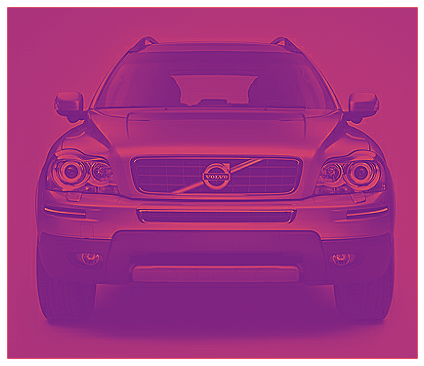

In [43]:
image_filter = tf.nn.conv2d(
    input=image,
    filters=kernel,
    strides=(1, 1),
    padding='SAME'
)

plt.figure(figsize=(6, 6))
plt.imshow(tf.squeeze(image_filter))
plt.axis('off')
plt.show();

Next is the detection step with the ReLU function. This function is much simpler than the convolution, as it doesn't have any parameters to set.

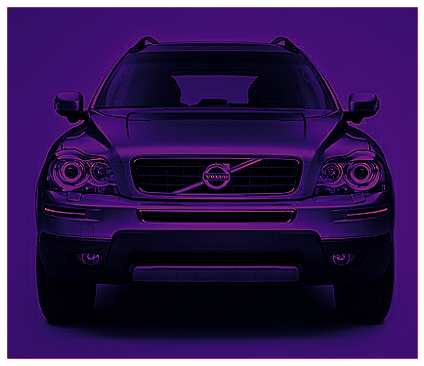

In [44]:
image_detect = tf.nn.relu(image_filter)

plt.figure(figsize=(6, 6))
plt.imshow(tf.squeeze(image_detect))
plt.axis('off')
plt.show();

And now we've created a feature map! Images like these are what the head uses to solve its classification problem. We can imagine that certain features might be more characteristic of Cars and others more characteristic of Trucks. The task of a convnet during training is to create kernels that can find those features.